#Chapter5

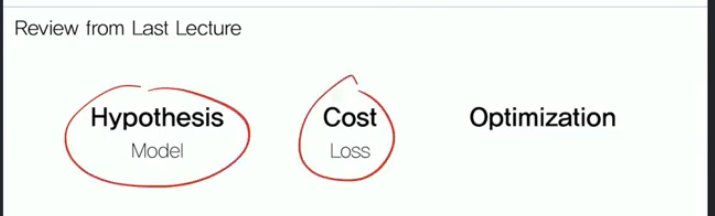

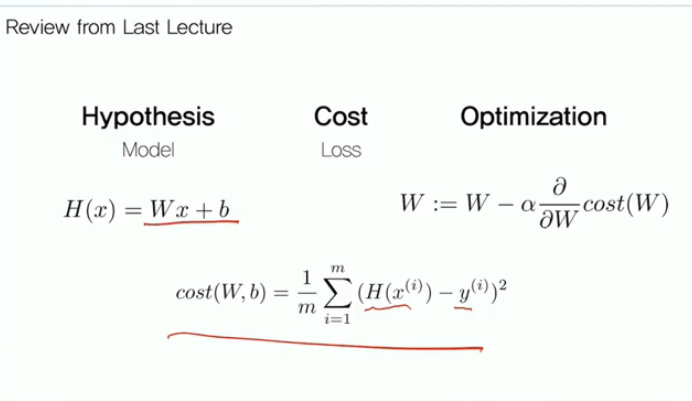

Cost를 편미분 Gradient를 반대방향으로 업데이트한다.  

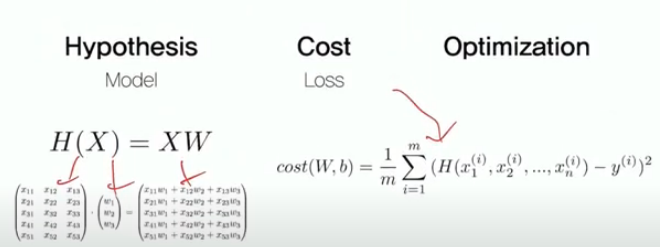

입력이 2차원인 데이터를 만들 예정이다. 
<br>한 쪽은 log함수, 다른쪽은 cos, sin함수이다.
<br>보이지 않은 데이터를 분류하고 예측

데이터 준비, 모델 만들기(MLP), 손실함수 만들기, 예측수행, (Report보고서 만들기 Loss와 matric을 볼 예정) 

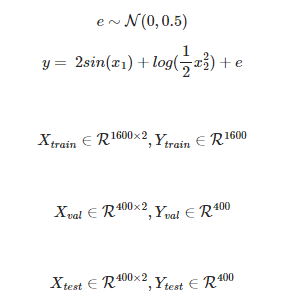

1.데이터를 생성
<br>x1, x2가 가상의 분포이다. 2sin+log(1/2x^2)+e(잡음)의 식으로 구성되어 있다.

x1의 최솟값과 최댓값: 0.002972313989003661 9.998230998304798
e의 평균: 0.0 e의 분산: 0.4998820568719046


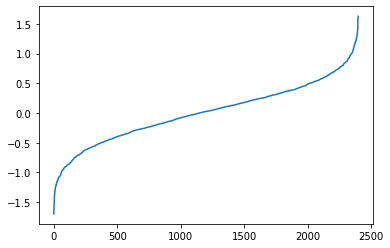

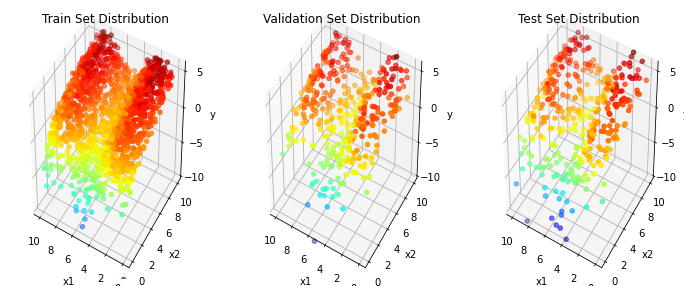

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

num_data = 2400 #데이터의 수는 2400개
x1 = np.random.rand(num_data) * 10 #x1은 *10을 함으로써 0부터 10까지의 랜덤 숫자를 총 2400개를 균일하게 생성한다. 
print("x1의 최솟값과 최댓값:",x1.min(), x1.max())
x2 = np.random.rand(num_data) * 10 #np.random.rand(데이터의 갯수) * 크기 (크기 설정 안하면 0부터 1까지 균등한 분포)
e = np.random.normal(0, 0.5, num_data) #잡음은 가우시안 분포(정규분포)를 이용하여 평균은 0, 표준편자는 0.5인 난수 생성
print("e의 평균:",np.round(e.mean()), "e의 분산:", e.std())
plt.plot(np.sort(e))#np.sort(e)로 np.array의 크기정렬을 하였으며 가우시안 분포를띄는걸 볼 수 있다. 
X = np.array([x1, x2]).T #x1과 x2를 눕히고 싶어서 2*2400에서 2400*2가 된다. 
y = 2*np.sin(x1) + np.log(0.5 * x2 **2) + e
#훈련, 검증 데이터를 나누기
train_X, train_y = X[:1600, :], y[:1600] #2400*2인데 [:1600, :]는 x1과 x2가 쌍으로 1600개까지 train_data
val_X, val_y = X[1600:2000, :], y[1600: 2000] #1600qnxj 2000은 validation
test_X, test_y = X[2000:, :], y[2000:] 

#그래프 시각화
#그래프를 그리는 방법: 1. plt.plot(그래프를 1개 그릴 때)
#2.여러개를 그리고 싶으면 fig를 지정 fig = plt.subplot(figsize = (, ))
#3. subplot은 figure에 들어가는 작은 그림이다. add_subplot(1, 3, 1), add_subplot(1, 3, 2), add_subplot(1, 3, 3)
#subplot을 행은 1개 열은 총 3개 그리기 projection = '3d' 3d를 그리기
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1, projection = '3d')
ax1.scatter(train_X[:,0], train_X[:,1], train_y, c=train_y, cmap = 'jet')#X[0]은 x1. X[1]은 x2이다.

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()



코드메모: 
<br>3D그래프 그릴때: from mpl_toolkits import mplot3d이용
<br>1. fig = plt.figure(figsize = ()) 피규어 지정
2. plt.add_subplot(1, 3, 1, projection = '3d')
<br>총 3개를 그릴 것이며, 3d그래프를 그릴 것이다. 
3. plt.scatter(x1, x2, y, c=y, cmap = 'jet')
<br>x1, x2, y값, 색깔, 색깔변화(colorbar) (산점도)
<br>cmap은 rainbow등등, 색조화가 다르다. 
<br>np.random.rand(개수) * 크기 
<br>0부터 1까지의 난수가 0부터 크기만큼으로 난수개수로 바뀜. 
4. ax1.set_xlabel,set_ylabel, set_zlabel
<br>ax1.set_title
<br>ax1.set_xlim(), set_ylim(), set_zlim()
<br>라벨설정, 제목설정, 경계설정 
5. ax1.view_init()
ax1.invert_xaxis():x축 바꾸기등등

<br>np.random.normal(평균, 표준편차, 데이터 개수) 가우스 분포를 따르며 데이터의 개수만큼 난수를 생성

<br>np.sort()로 np.array의 크기를 정렬 가능 

<br>np.max() np.min() mp.mean() np.std()
<br>최대     최소     평균      표준편차

<br>X.T는 X의 전치 행렬을 뜻한다. 
1. x1 = np.array(2400개) 
2. x2 = np.array(2400개) 
3. np.array([x1, x2])의 형태는? 2*2400으로 세로 벡터가 되어 저장된다. 

<br>train_x, train_y = X[:1600, :], y[:1600]
<br>행은 1600까지, 열은 x1, x2가 모두 나와야해서 전체를 슬라이싱, y는 1차원이라서 1600까지 슬라이싱 

만약 회차를 거듭할 수록, validation 오차가 증가한다면?오버피팅이 발생했다.

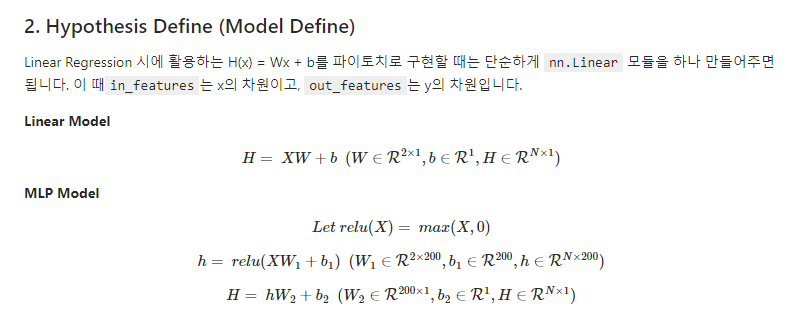

W는 2차원이다.x와 곱해서 1차원으로 바꾼다. b는 1차원으로 더해진다(bias) . 

2.모델을 정의

In [ ]:
import torch
import torch.nn as nn

class LinearModel(nn.Module): #nn.Module에서 가져와서 LinearModel을 형성
  def __init__(self): #hypothesis 한번 수행하는 곳. 
     super(LinearModel, self).__init__()
     self.linear = nn.Linear(2, 1, bias = True) #input_features, output_features, bias가 생성
     
  
  def forward(self, x): #x가 여기로 들어가서 W와 연산을 수행.
    x = torch.flatten(input_dim =1)
    return self.linear(x)
  
lm = LinearModel() #캡슐화
print(lm.parameters, lm.linear.weight, lm.linear.bias)
#파라미터를 직접 볼 수 있다. 



<bound method Module.parameters of LinearModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)> Parameter containing:
tensor([[-0.1527,  0.4309]], requires_grad=True) Parameter containing:
tensor([-0.2857], requires_grad=True)


class 모델이름 (nn.Module):  
  def __init__(self): 무조건 한번 실행해야함  
    super(모델이름, self).__init__()  
    self.linear1 = nn.Linear(입력, 출력, bias = True)  
    self.batch1 = nn.Batchnorm1d(출력)  
    self.relu = nn.ReLU()  
    (self.softmax = nn.Softmax())        
    (nn.Tanh()도 있다. RNN에 사용)       
    self.conv2 = nn.Conv2d(입력층, 출력층, 가로 세로크기, stride = 2 )  
    self.batch2 = nn.BatchNorm2d(출력의 층수)    
    self.max2 = n.MaxPool2d((height, width), stride = 2)    
    이런식으로 다양한 함수를 지정  

  def forward(self, 입력):  #전방계산을 정의 입력이 어떻게 통과할 지 정한다.   
  x = self.conv2(입력)  
  x = self.batch2(x)  
  x = self.relu(x)  
  x = torch.flatten(input_dim = 1)  #flatten할 때 배치는 건들지 않도록 꼭 input_dim =1 설정  
  x = self.linear1(x)  
  x = F.relu(self.batch1(x))  #이런 식으로도 relu사용 가능  
  return x  


그외 import torch.nn.functional as F  
return F.log_softmax(x, dim =1)  

+한 줄을 다 쓰고나서 띄어쓰기를 2번하면 줄바꿈을 할 수 있다.  



3.Loss_function구현

In [ ]:
reg_loss = nn.MSELoss()

predicted = torch.Tensor([0, 0, 0, 0])
labels = torch.Tensor([1, 0, 0, 0])
print(reg_loss(predicted, labels))
#기준 변수를 설정 
#기준(예측값, 정답값)에서 오차가 나온다. 

tensor(0.2500)


criterion = nn.MSELoss()  #목적함수를 정의 평균제곱 오차함수를 상속받았다.  
보통 쓰는 loss들   
nn.BCELoss()  이진분류 크로스엔트로피  
nn.CrossEntropyLoss()  다중분류 크로스엔트로피  
nn.NLLLoss()  로그우도 return F.log_softmax(x, dim = 1)을 해야한다. 




model = 모델이름()  #캡슐화    
import torch.optim as optim    
lr = 0.0001 #learning_rate설정    
optimizer = optim.SGD(model.parameters, lr = lr)  #최적화하는 함수 설정, 학습속도  
(eps도 설정가능, 여기에 weight_decay를 사용해 L2 norm이 사용 가능하다)   
optim.Adam()  
optim.Adagrad()  
optim.RMSprop()  

4.학습 및 평가

1. 리스트 만들기  
epoch리스트, train_loss, val_loss, accuracy리스트 만들기    

2. 학습하기
for i in range(epoch):    
model.train()  
train_x, true_y설정 torch.Tensor(데이터), torch.Tensor(라벨)  
predicted = model(train_x) 데이터를 모델에 넣어 학습  
loss = criterion(predicted, train_y)  #loss 구하기 무조건!!   
loss(예측값, 정답값)순서 지키기!
loss.backward()  #오류역전파  
opitmizer.step()  #오류역전파를 토대로 파라미터를 수정   

3. model.eval()은 검증을 위해 사용한다.  
단순히 loss만 계산하여 리스트에 append 하면된다.     





그외)  
squeeze() 차원을 맞춰주기위해 1인 차원제거   
unsqueeze(위치) 이건 원하는 위치에 차원 1 추가   
2차원이였다면 앞에 1추가해서 3차원이 된다.       

detach().numpy()  
gradient 연산에서 분리후 넘파이로 바꾸기   
그냥 .item()을 써도 된다!  (얘는 연산에서 분리후 그냥 scalar로 만들어버림)   



In [ ]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

lr = 0.005
model = MLPModel() #캡슐화
optimizer = optim.SGD(model.parameters(), lr = lr) #learning_rate를 설정

#epoch는 주어진 데이터를 몇번 보여줄지 결정
list_epoch = []
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

epoch = 4000 #iteration과 헷갈릴 수 있음 iteration은 파라미터가 한번 업데이트 되는 횟수.
#iteration은 10만개의 데이터를 한번에 training을 할 수 없어서 100개의 배치로 나눠서 훈련을 시킨다.
#이걸로 gradient구하고 iteration을 한다. 
#ieration은 batch_size마다 발생, epoch는 데이터의 전체를 보고 업데이트한다. 
#배치와 미니배치는 차이가 거의 없다.

#===============학습================
for i in range(epoch):
  model.train() #이걸 해줘야 training을 한다. evaluation일 때는 model.eval()을 사용 모드를 결정
  optimizer.zero_grad() #연산 그래프를 초가화 안그러면 연산이 누적되어서 발산 

  input_x = torch.Tensor(train_X)  #np.array, torch.Tensor()
  true_y = torch.Tensor(train_y)   #파이토치로 연산하려면 무조건 입력데이터 텐서로 바꾸기
  pred_y = model(input_x) #model에 input_x를넣으면 된다. 이때 결과값의 형태가 (1600, 1)이다! 엥 true_y는 (1600,)인데?
  loss = reg_loss(pred_y.squeeze(), true_y) #이래서 예측값에서 pred_y.squeeze()를 통해 불필요한 1인 차원을 없앤다.
  loss.backward()    #.squeeze()안하면 학습이 안될 수 있다!! 그리고 gradient알아서 계산한다. 
  optimizer.step()  
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy()) #loss값에서 gradient값을 신경 안쓰고 loss라는 순수한 숫자를 원할때 사용
  #loss.item()사용해도 된다.!!!!!

#===============검증================
  model.eval()
  optimizer.zero_grad()
  input_x = torch.Tensor(val_X)
  true_y = torch.Tensor(val_y)
  pred_y = model(input_x)
  loss = reg_loss(pred_y.squeeze(), true_y)
  list_val_loss.append(loss.item())

#=============시험=============
  if i % 200 == 0: #200회의 학습마다 모델이 예측한 분포 그리기
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(test_X)
    true_y = torch.Tensor(test_y)
    pred_y = model(input_x).detach().numpy()
    mae = mean_absolute_error(true_y, pred_y)
    list_mae.append(mae)
    list_mae_epoch.append(i)

    #그림그리기 
    #test_dataset그리기
    fig = plt.figure(figsize = (15, 5))
    ax1 = fig.add_subplot(1, 3, 1, projection = '3d')
    ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c = test_y, cmap = 'jet')

    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    
    ax1.set_zlim(-10, 6)
    ax1.view_init(40, -40)
    ax1.set_title('True test y')
    ax1.invert_xaxis()

    #예측 그리기

    ax2 = fig.add_subplot(1, 3, 2, projection = '3d')
    ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y,  c=pred_y[:,0], cmap='jet')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_zlabel('y')
    ax2.set_zlim(-10, 6)
    ax2.view_init(40, -40)
    ax2.set_title('Predicted test y')
    ax2.invert_xaxis()

    input_x = torch.Tensor(train_X)
    pred_y = model(input_x).detach().numpy() 
    pred_y = pred_y.squeeze()
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y, cmap='jet')

    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_zlabel('y')
    ax3.set_zlim(-10, 6)
    ax3.view_init(40, -40)
    ax3.set_title('Predicted train y')
    ax3.invert_xaxis()
        
    plt.show()
    print(i, loss)








Output hidden; open in https://colab.research.google.com to view.

5. Report하기

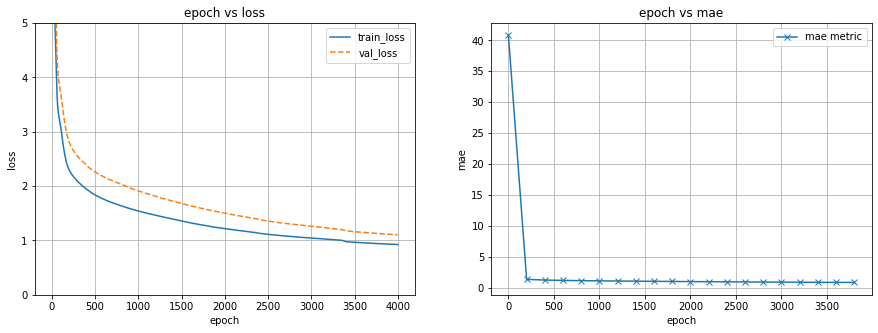

In [ ]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid(True)
ax1.legend()
ax1.set_title('epoch vs loss')

#metric function으로 그려보기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()





#Chapter6

Binary Classification 
<br>supervised learning
<br>discrete vs continuous 

<br>classification problem을 머신러닝으로 해결 
<br>binary classification
<br>수학적으로 나타내기 0과 1에 대응
<br>Hypothesis
<br>Binary classification
<br>시험 pass? fail?
공부시간이 적으면 실패, 공부시간이 많으면 성공
<br>Linear regression이 가능?

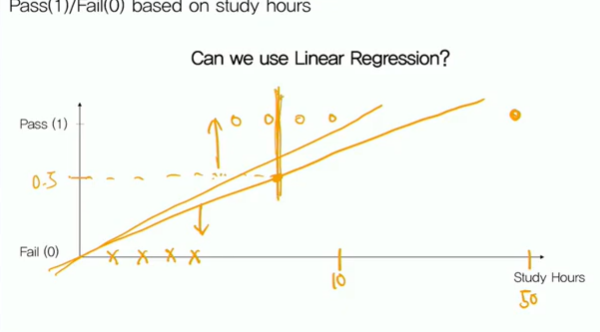

Linear Rgeression을 잘 분류했다가 멀리떨어진 데이터에 의해 
선이 따라가면서 오분류가 된다. continuous가 output?
Linear Regression을 그대로 가져오기 뭐시기함.

Linear Regression에다가 어떤 적절한 조칠르 취할까?
SIgmoid Function을 활용!! 
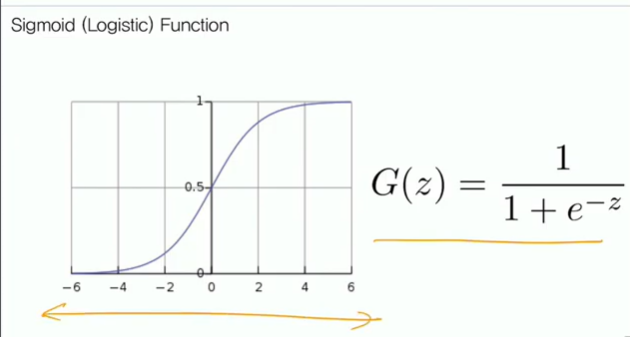

G라는 함수가 무한으로 가면 1, -무한으로 가면 0이 된다. sigma랑 닮아서 시그모이드이다. 

새로운 이론!

$$H(X)=\frac{1}{1+e^{-WX}}$$

새로운 Cost를 정의한다. 
<br>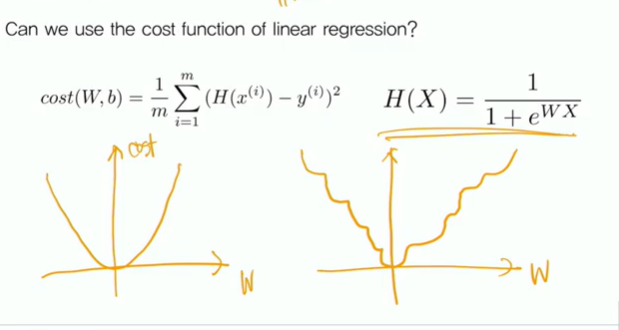

기존 오차 함수를 정의하면 saddle point가 너무나 많아서 학습하다가 매개변수가 이상한 곳에 자꾸 멈춘다.

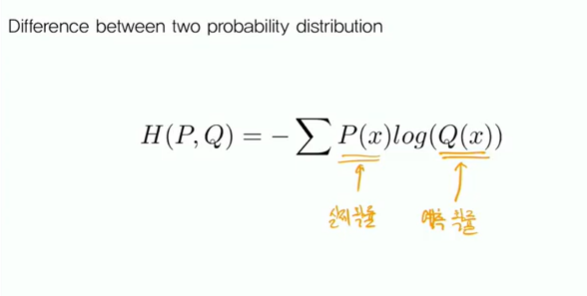

엔트로피: 한 시스템이 얼마나 불안정할 것인가?
<br>P(x)는 실제 확률이다. Q(x)는 예측한 확률이다. 


얼마나 예측을 못하는가에 따라 값이 커진다. 
<br>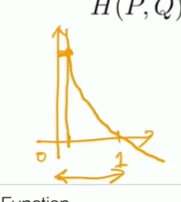

Q(x)가 예측을 못할수록 뒤로 커진다.

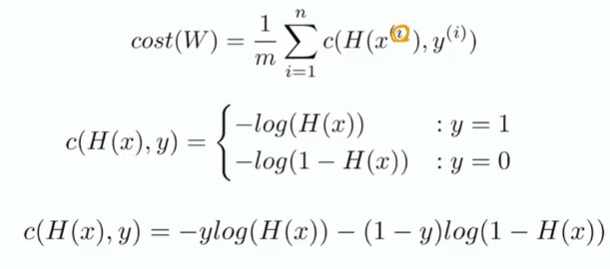

i는 각 데이터 
<br>y가 1인경우: -log(H(x))       y가 0인 부분: -log(1-H(x))
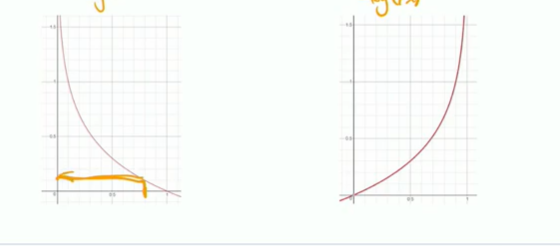



y가 1인 부분은 예측한 확률이 1에 가까워야 처벌이 적으며, y가 0인 부분은 예측 확률을 0과 가깝게 해야 피해를 최소화할 수 있다.

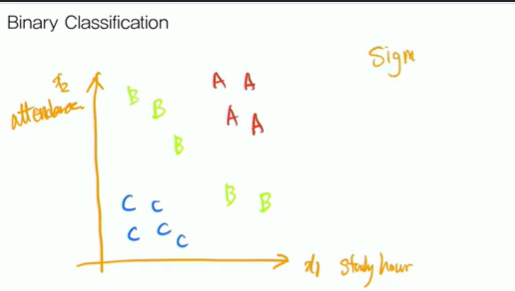

시그모이드: 1대1대응 
<br> 출석과 공부시간을 다뤄야해서 w가 2개가 등장 
<br>w1x1 + w2x2 + b = 0
<br>input이 2개라 평면이다. 

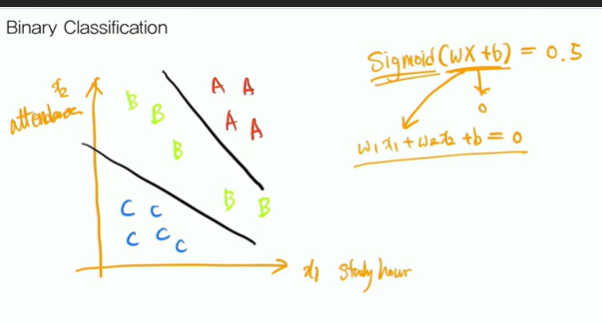

새로운 가설 Multinominal Classification

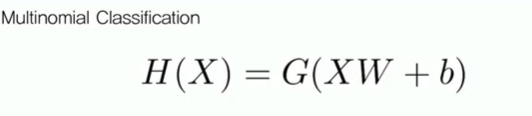

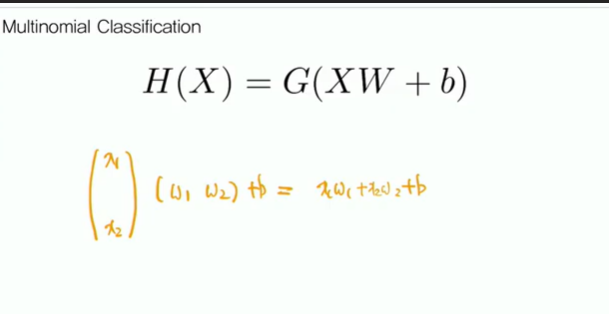

이것이 before

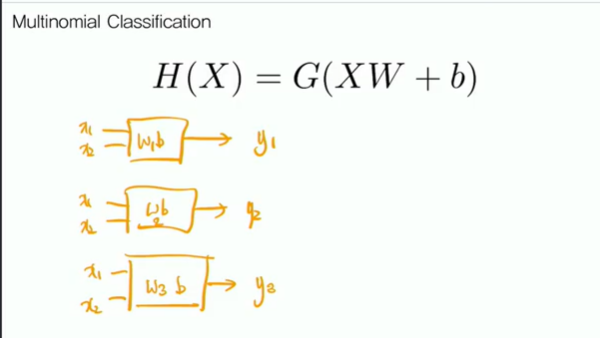

after이다. 각각 class에 대응하는 확률을 출력하길 원한다.
<br>확률의 특징
1. 0과 1사이의 값
2. 다 합치면 1이 된다. 

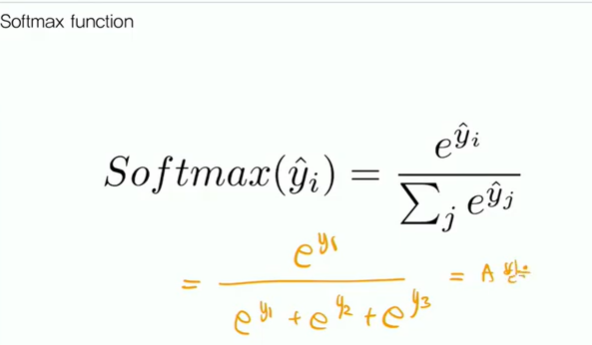

3가지 합을 합했다. continuous를 softmax로 표현

이러한 새로운 hypothesis에서 cost는?

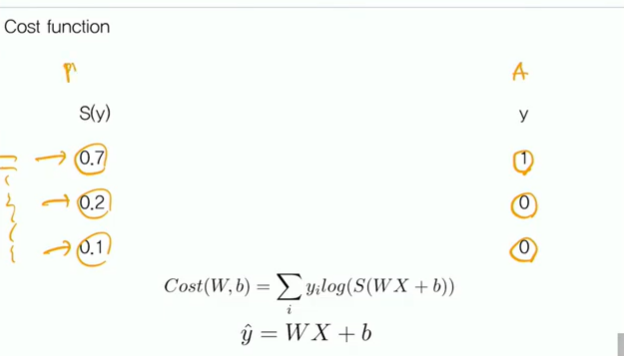

y는 정답 S(y)는 츨력(확률값)이다. 두 확률분포가 얼마나 다른지 그대로 가져와서 비교
<br>class가 여러개라서 sum을 한다. 


BinaryCrossEntropy는 이진분류, Softmax는 다중분류이다. 
<br>둘다 CrossEntropy의 개념에서 왔다. 